In [14]:
import sys
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append("../../")
from summarizer.utils.eval import upsample

In [156]:
def plot_gt(machine_scores, machine_summary, gtscore, gtsummary, ax):
    df_scores = pd.DataFrame(machine_scores, columns=["scores"])
    df_scores["summary"] = np.nan
    df_scores.loc[machine_summary == 1, "summary"] = 1

    df_scores = df_scores.loc[range(0, df_scores.shape[0], 500)]
    df_scores = df_scores.reset_index(drop=True)

    df_scores["summary"].plot(ax=ax, color="green", alpha=0.0)
    ax.fill_between(df_scores["summary"].index, 0, df_scores["summary"], facecolor="green", alpha=0.5)

    ax.legend().set_visible(False)
    ax.set_ylim(0,1)
    ax.set_axis_off()

def plot_score(machine_scores, ax):
    df_scores = pd.DataFrame(machine_scores, columns=["scores"])
    df_scores = df_scores.loc[range(0, df_scores.shape[0], 500)]
    df_scores = df_scores.reset_index(drop=True)
    df_scores["scores"].plot(ax=ax, color="gray", alpha=0.0, logy=True)
    ax.fill_between(df_scores["scores"].index, 0, df_scores["scores"], facecolor="gray", alpha=0.8)
    ax.legend().set_visible(False)
    ax.set_axis_off()

def plot_pred(machine_scores, machine_summary, gtscore, gtsummary, ax):
    df_scores = pd.DataFrame(machine_scores, columns=["scores"])
    df_scores["summary"] = np.nan
    df_scores["gtsummary"] = np.nan
    df_scores.loc[machine_summary == 1, "summary"] = df_scores.loc[machine_summary == 1, "scores"]
    df_scores.loc[gtsummary == 1, "gtsummary"] = -1

    df_scores = df_scores.loc[range(0, df_scores.shape[0], 500)]
    df_scores = df_scores.reset_index(drop=True)

    df_scores["scores"].plot(ax=ax, color="gray", alpha=0.0, logy=True)
    ax.fill_between(df_scores["scores"].index, 0, df_scores["scores"], facecolor="gray", alpha=0.8)
    df_scores["summary"].plot(ax=ax, color="blue", alpha=0.0, logy=True)
    ax.fill_between(df_scores["summary"].index, 0, df_scores["summary"], facecolor="blue", alpha=0.5)
    
    ax.legend().set_visible(False)
    ax.set_axis_off()

def plot_video(machine_scores, machine_summary, gtscore, gtsummary):
    min_length = min(gtscore.shape[0], 
        gtsummary.shape[0], machine_scores.shape[0], 
        machine_summary.shape[0])
    machine_scores = machine_scores[:min_length-1]
    machine_summary = machine_summary[:min_length-1]
    gtscore = gtscore[:min_length-1]
    gtsummary = gtsummary[:min_length-1]

    fig, ax = plt.subplots(2, figsize=(15,8))
    plot_pred(machine_scores, machine_summary, gtscore, gtsummary, ax[0])
    plot_gt(gtscore, gtsummary, gtscore, gtsummary, ax[1])
    plt.subplots_adjust(wspace=0, hspace=0)
    return plt

nalcs_w5d2_CLG_IMT_g3.mp4


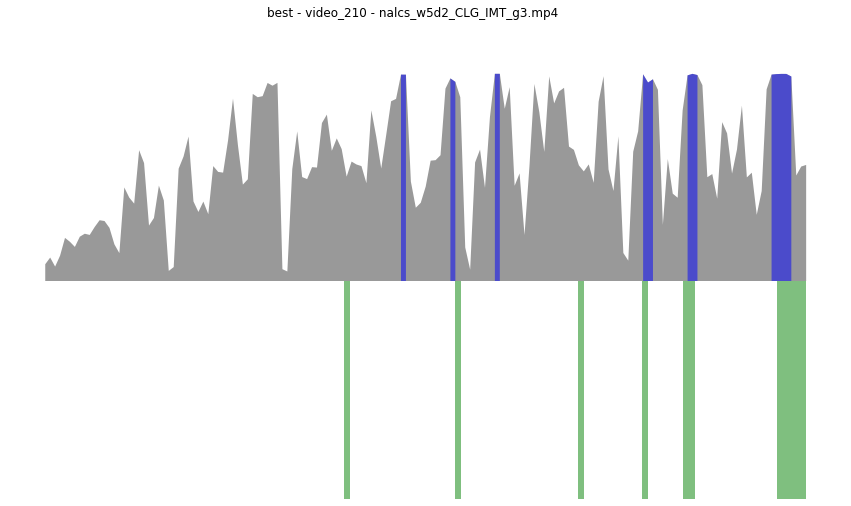

nalcs_w5d2_CLG_IMT_g3.mp4


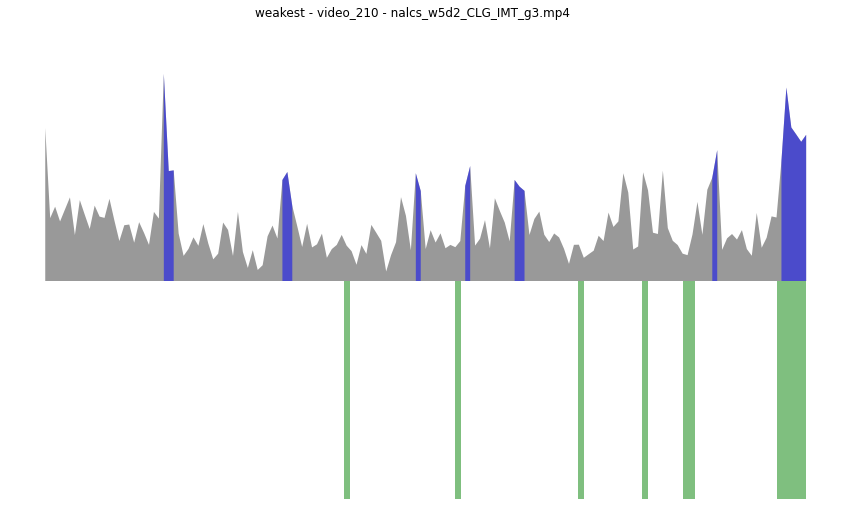

nalcs_w5d2_CLG_IMT_g3.mp4


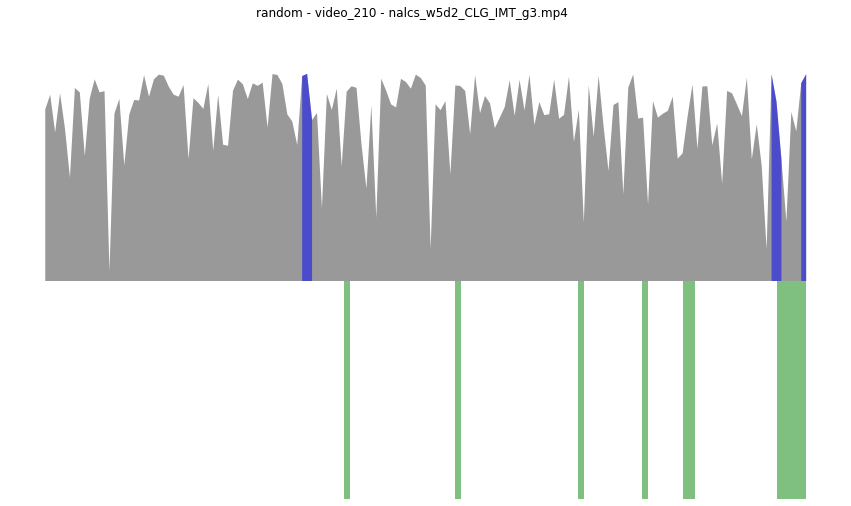

In [154]:
# 156, 157, 166, 183, 210, 250, 253, 258
key = "video_210"

dataset = h5py.File("summarizer_dataset_LOL_google_pool5.h5", "r")
best = h5py.File("VasNet_LOL_splits.json_preds.h5", "r")['Twitch-LOL.h5']
weakest = h5py.File("DSN_LOL_splits.json_preds.h5", "r")['Twitch-LOL.h5']
random = h5py.File("Random_LOL_splits.json_preds.h5", "r")['Twitch-LOL.h5']

for model, pred in [("best", best), ("weakest", weakest), ("random", random)]:
    v = dataset[key]
    p = pred[key]
    n_frames = v["n_frames"][...].item()
    positions = v["picks"][...]

    gtscore = upsample(v["gtscore"], n_frames, positions)
    gtsummary = upsample(v["gtsummary"], n_frames, positions)
    machine_scores = p["machine_scores"][...]
    machine_summary = p["machine_summary"]

    plt = plot_video(machine_scores, machine_summary, gtscore, gtsummary)
    plt.suptitle(f"{model} - {key} - {v['video_name'][()]}")
    plt.savefig(f'final_fig/{key}-{model}.png')
    plt.show()

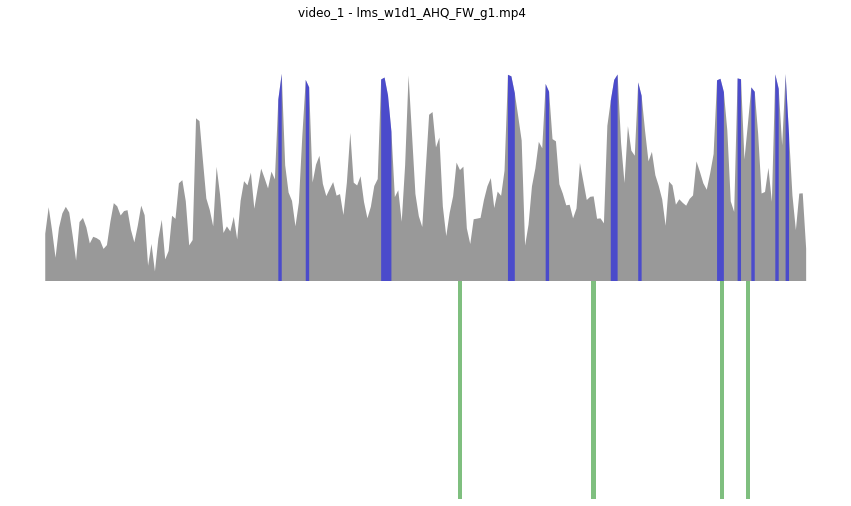

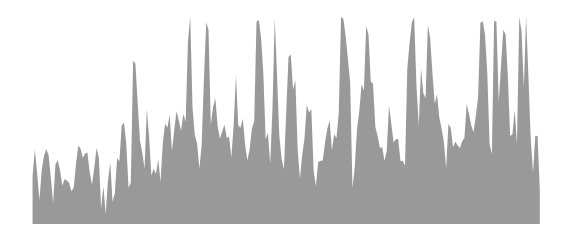

In [160]:
for key in list(dataset.keys()):
    v = dataset[key]
    p = preds[key]
    n_frames = v["n_frames"][...].item()
    positions = v["picks"][...]

    gtscore = upsample(v["gtscore"], n_frames, positions)
    gtsummary = upsample(v["gtsummary"], n_frames, positions)
    machine_scores = p["machine_scores"][...]
    machine_summary = p["machine_summary"]

    plt = plot_video(machine_scores, machine_summary, gtscore, gtsummary)
    plt.suptitle(f"{key} - {v['video_name'][()]}")
    plt.savefig(f'figs/{key}.png')

    fig, ax = plt.subplots(figsize=(10,4))
    plot_score(machine_scores, ax)
    plt.subplots_adjust(wspace=0, hspace=0)